<a href="https://colab.research.google.com/github/Saurav-Somani/SNA-Project/blob/main/SNA_Round_1_google_web.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import csv
import random

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path = "/content/drive/My Drive/SNA Project/web-Google.txt"

In [4]:
res=[]
with open(path) as f:
  data = f.readlines()
for l in data:
  if l:
    words = l.split()
    res.append(words)

In [5]:
sample = random.sample(res, 10000)
filename=open('data.txt','a')
for item in sample:
  filename.write(item[0] + " " + item[1] + "\n")

In [6]:
G = nx.read_edgelist(path,nodetype=int,create_using=nx.DiGraph())
#print(nx.info(G))

In [7]:
G1 = nx.read_edgelist('data.txt',nodetype=int,create_using=nx.DiGraph())

In [8]:
def degree_histogram_directed(G, in_degree=False, out_degree=False):
    nodes = G.nodes()
    if in_degree: #for finding the indegree
        in_degree = dict(G.in_degree())
        degseq=[in_degree.get(k,0) for k in nodes] 
    elif out_degree: #for finding the outdegree
        out_degree = dict(G.out_degree())
        degseq=[out_degree.get(k,0) for k in nodes]
    else:
        degseq=[v for k, v in G.degree()]
    dmax=max(degseq)+1
    print(dmax)
    freq= [ 0 for d in range(dmax) ]
    for d in degseq:
        freq[d] += 1
    return freq
    

6327
457


Text(0, 0.5, 'Frequency')

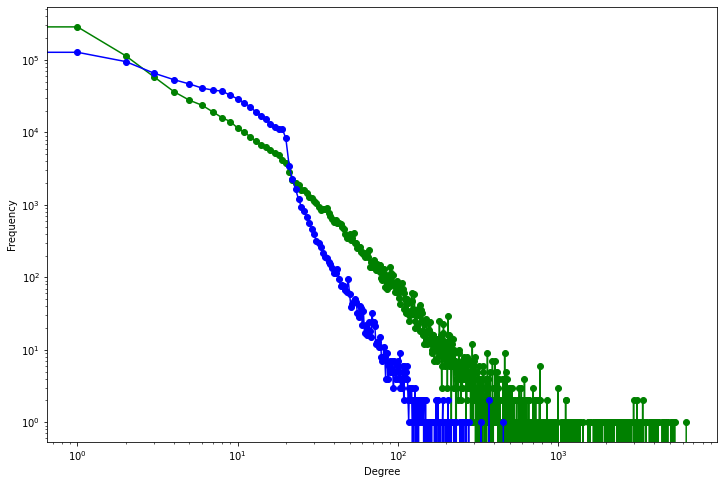

In [9]:
in_degree_freq = degree_histogram_directed(G, in_degree=True)
out_degree_freq = degree_histogram_directed(G, out_degree=True)
degrees = range(len(in_degree_freq))
plt.figure(figsize=(12, 8)) 
plt.loglog(range(len(in_degree_freq)), in_degree_freq, 'go-', label='in-degree') 
plt.loglog(range(len(out_degree_freq)), out_degree_freq, 'bo-', label='out-degree')
plt.xlabel('Degree')
plt.ylabel('Frequency')

In [10]:
cnt=0
sum=0
cnt_nodes=0
for d in in_degree_freq:
        sum = sum + d*cnt
        cnt = cnt + 1
        cnt_nodes = cnt_nodes + d

#cnt_nodes
print(sum)
avg_in_degree = sum/cnt_nodes
avg_in_degree

5105039


5.829580010802626

In [11]:
cnt=0
sum=0

for d in out_degree_freq:
        sum = sum + d*cnt
        cnt = cnt + 1
        
print(sum)
avg_out_degree = sum/cnt_nodes
avg_out_degree

5105039


5.829580010802626

In [12]:
cnt=0
sum=0

for d in in_degree_freq:
        sum = sum + d*((cnt - avg_in_degree)**2)
        cnt = cnt + 1


std_dev_in = (sum/cnt_nodes)**0.5
std_dev_in

39.22897027682519

In [13]:
cnt=0
sum=0
for d in out_degree_freq:
        sum = sum + d*((cnt - avg_out_degree)**2)
        cnt = cnt + 1


std_dev_out = (sum/cnt_nodes)**0.5
std_dev_out

6.593697311073109

# **Centrality Measures**

**Degree Centrality**

{442528: 0.0, 306958: 5.6085249579360626e-05, 836558: 0.0, 205581: 5.6085249579360626e-05, 594293: 0.0, 674164: 5.6085249579360626e-05, 209151: 0.0, 181334: 5.6085249579360626e-05, 335342: 0.0, 609886: 5.6085249579360626e-05, 155829: 0.0, 537039: 0.0010095344924284913, 361556: 0.0, 690211: 5.6085249579360626e-05, 137210: 0.0, 580256: 5.6085249579360626e-05, 315382: 0.0, 796719: 5.6085249579360626e-05, 654387: 0.0, 587935: 0.00028042624789680314, 207028: 0.0, 332463: 5.6085249579360626e-05, 196520: 0.0, 6111: 5.6085249579360626e-05, 202724: 0.0, 883244: 5.6085249579360626e-05, 477922: 0.0, 646710: 5.6085249579360626e-05, 323341: 0.0, 195650: 5.6085249579360626e-05, 419387: 0.0, 213432: 0.0006730229949523275, 73308: 0.0, 843868: 5.6085249579360626e-05, 235659: 0.0, 445903: 5.6085249579360626e-05, 119719: 0.0, 607402: 5.6085249579360626e-05, 657806: 0.0, 90786: 5.6085249579360626e-05, 796849: 0.0, 114705: 5.6085249579360626e-05, 80794: 0.0, 423631: 5.6085249579360626e-05, 284990: 0.0, 845

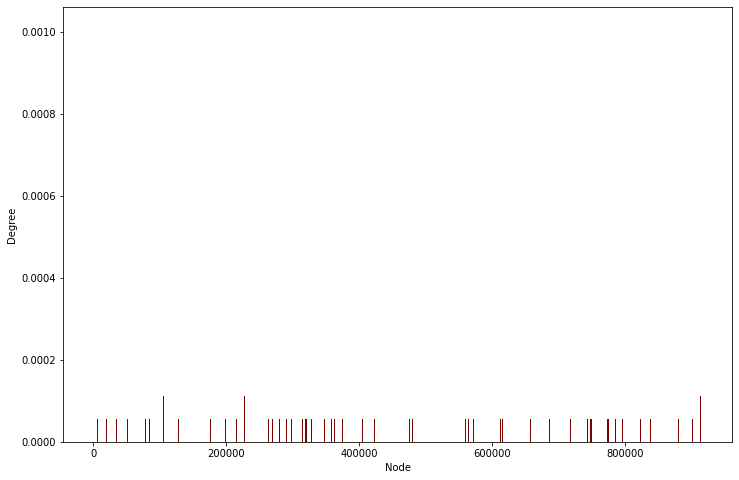

In [14]:

inDegreeCentrality = nx.in_degree_centrality(G1)
print(inDegreeCentrality)
# inDegreeCentrality = dict(sorted(inDegreeCentrality.items(), key=lambda item: item[1],reverse = True)[0:30])

#print(inDegreeCentrality)

plt.figure(figsize=(12, 8)) 
ke = list(inDegreeCentrality.keys());
valu = list(inDegreeCentrality.values());
#print(key)
#print(value)
plt.bar(ke,valu, color ='maroon',width=10
        ) 
plt.xlabel('Node')
plt.ylabel('Degree')
plt.show()


In [15]:
outDegreeCentrality = nx.out_degree_centrality(G1)
outDegreeCentrality

{442528: 5.6085249579360626e-05,
 306958: 0.0,
 836558: 5.6085249579360626e-05,
 205581: 0.0,
 594293: 5.6085249579360626e-05,
 674164: 0.0,
 209151: 5.6085249579360626e-05,
 181334: 0.0,
 335342: 5.6085249579360626e-05,
 609886: 0.0,
 155829: 5.6085249579360626e-05,
 537039: 0.0,
 361556: 5.6085249579360626e-05,
 690211: 0.0,
 137210: 5.6085249579360626e-05,
 580256: 0.0,
 315382: 5.6085249579360626e-05,
 796719: 0.0,
 654387: 5.6085249579360626e-05,
 587935: 0.0,
 207028: 5.6085249579360626e-05,
 332463: 0.0,
 196520: 5.6085249579360626e-05,
 6111: 0.0,
 202724: 5.6085249579360626e-05,
 883244: 0.0,
 477922: 5.6085249579360626e-05,
 646710: 0.0,
 323341: 5.6085249579360626e-05,
 195650: 0.0,
 419387: 5.6085249579360626e-05,
 213432: 0.0,
 73308: 5.6085249579360626e-05,
 843868: 0.0,
 235659: 5.6085249579360626e-05,
 445903: 0.0,
 119719: 5.6085249579360626e-05,
 607402: 0.0,
 657806: 5.6085249579360626e-05,
 90786: 0.0,
 796849: 5.6085249579360626e-05,
 114705: 0.0,
 80794: 5.6085249

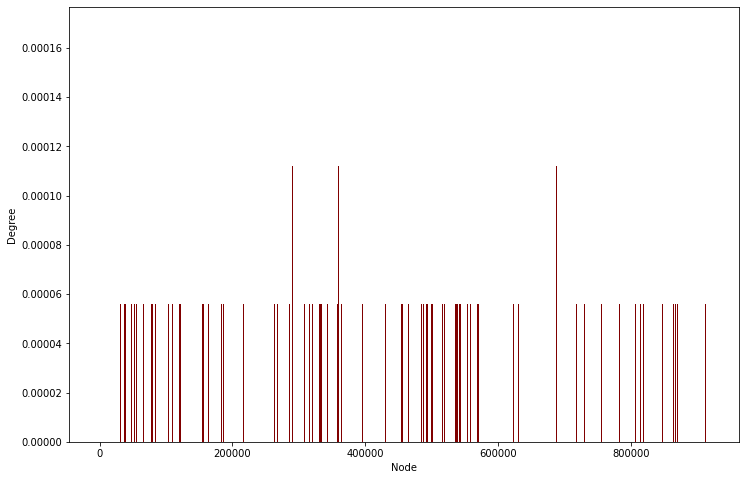

In [16]:
# from networkx.algorithms.centrality.degree_alg import out_degree_centrality
outDegreeCentrality = nx.out_degree_centrality(G1)
plt.figure(figsize=(12, 8)) 
key = list(outDegreeCentrality.keys());
value = list(outDegreeCentrality.values());
#print(key)
#print(value)
plt.bar(key,value, color ='maroon',width=10
        ) 
plt.xlabel('Node')
plt.ylabel('Degree')
plt.show()

**EigenVector Centrality**

In [17]:
eigenVectorCentrality = nx.eigenvector_centrality_numpy(G1)
eigenVectorCentrality

{442528: 1.1277927986351023e-18,
 306958: -6.278498518488914e-19,
 836558: -5.668543425871e-19,
 205581: 6.205894334625361e-19,
 594293: 4.6346508112574943e-20,
 674164: -6.336229434594486e-19,
 209151: 7.16331437868181e-19,
 181334: -1.4720899743544776e-18,
 335342: -1.2509905194395256e-20,
 609886: -1.0832962387405486e-18,
 155829: 1.7216104055692492e-18,
 537039: 3.1352052653764308e-18,
 361556: -4.294677012203937e-19,
 690211: -6.166991362404905e-19,
 137210: 4.504203531384908e-19,
 580256: 1.0040696873301855e-18,
 315382: -5.528241793331295e-19,
 796719: 7.417730487323541e-19,
 654387: 1.1742781404104083e-20,
 587935: 1.2286722687131408e-20,
 207028: -1.185561017025951e-19,
 332463: 1.2862090562425986e-18,
 196520: -4.850647911281097e-19,
 6111: 1.0212057034270751e-18,
 202724: -2.2040471178597503e-19,
 883244: 2.355850910394015e-18,
 477922: -2.5852552043043762e-20,
 646710: -1.1881579139307133e-18,
 323341: -4.27034330072556e-19,
 195650: 1.7730660250979393e-18,
 419387: 1.57168

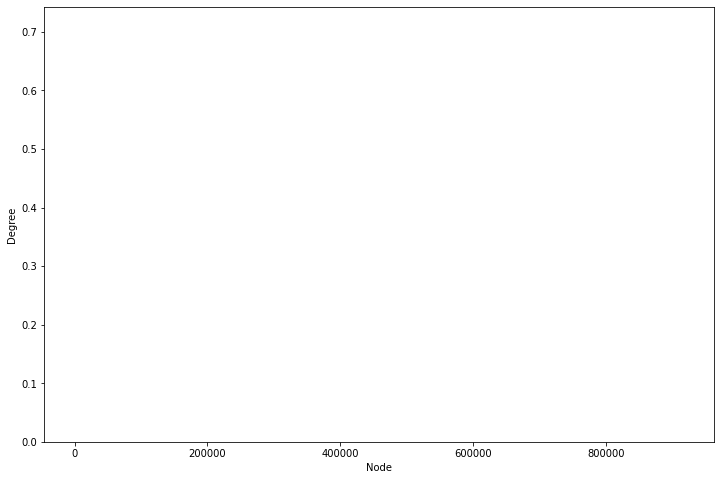

In [18]:
eigenVectorCentrality = nx.eigenvector_centrality(G1)
plt.figure(figsize=(12, 8)) 
key = list(eigenVectorCentrality.keys());
value = list(eigenVectorCentrality.values());
#print(key)
#print(value)
plt.bar(key,value, color ='maroon',width=10
        ) 
plt.xlabel('Node')
plt.ylabel('Degree')
plt.show()

**Katz Centrality**

In [19]:
katzCentrality = nx.katz_centrality(G1,max_iter=10000)
katzCentrality

{442528: 0.007091461181238073,
 306958: 0.00780060729936188,
 836558: 0.007091461181238073,
 205581: 0.00780060729936188,
 594293: 0.007091461181238073,
 674164: 0.00780060729936188,
 209151: 0.007091461181238073,
 181334: 0.00780060729936188,
 335342: 0.007091461181238073,
 609886: 0.00780060729936188,
 155829: 0.007091461181238073,
 537039: 0.019856091307466604,
 361556: 0.007091461181238073,
 690211: 0.00780060729936188,
 137210: 0.007091461181238073,
 580256: 0.00780060729936188,
 315382: 0.007091461181238073,
 796719: 0.00780060729936188,
 654387: 0.007091461181238073,
 587935: 0.010637191771857108,
 207028: 0.007091461181238073,
 332463: 0.00780060729936188,
 196520: 0.007091461181238073,
 6111: 0.00780060729936188,
 202724: 0.007091461181238073,
 883244: 0.00780060729936188,
 477922: 0.007091461181238073,
 646710: 0.00780060729936188,
 323341: 0.007091461181238073,
 195650: 0.00780060729936188,
 419387: 0.007091461181238073,
 213432: 0.01560121459872376,
 73308: 0.00709146118123

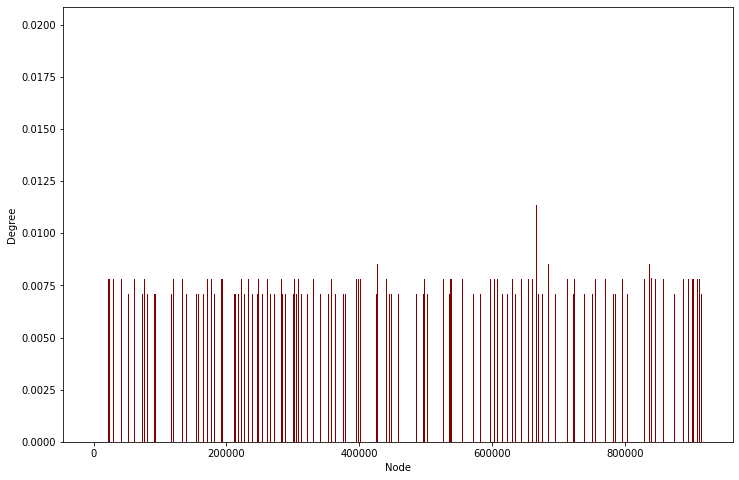

In [20]:
katzCentrality = nx.katz_centrality(G1)
plt.figure(figsize=(12, 8)) 
key = list(katzCentrality.keys());
value = list(katzCentrality.values());
#print(key)
#print(value)
plt.bar(key,value, color ='maroon',width=10
        ) 
plt.xlabel('Node')
plt.ylabel('Degree')
plt.show()

**Page Rank Centrality**

In [21]:
pageRankCentrality = nx.pagerank(G1, max_iter = 10000)
pageRankCentrality

{442528: 3.820529241367382e-05,
 306958: 7.142677511590018e-05,
 836558: 3.820529241367382e-05,
 205581: 7.142677511590018e-05,
 594293: 3.820529241367382e-05,
 674164: 7.142677511590018e-05,
 209151: 3.820529241367382e-05,
 181334: 7.142677511590018e-05,
 335342: 3.820529241367382e-05,
 609886: 7.142677511590018e-05,
 155829: 3.820529241367382e-05,
 537039: 0.0006361919810537481,
 361556: 3.820529241367382e-05,
 690211: 7.142677511590018e-05,
 137210: 3.820529241367382e-05,
 580256: 7.142677511590018e-05,
 315382: 3.820529241367382e-05,
 796719: 7.142677511590018e-05,
 654387: 3.820529241367382e-05,
 587935: 0.00020431270592480562,
 207028: 3.820529241367382e-05,
 332463: 7.142677511590018e-05,
 196520: 3.820529241367382e-05,
 6111: 7.142677511590018e-05,
 202724: 3.820529241367382e-05,
 883244: 7.142677511590018e-05,
 477922: 3.820529241367382e-05,
 646710: 7.142677511590018e-05,
 323341: 3.820529241367382e-05,
 195650: 7.142677511590018e-05,
 419387: 3.820529241367382e-05,
 213432: 

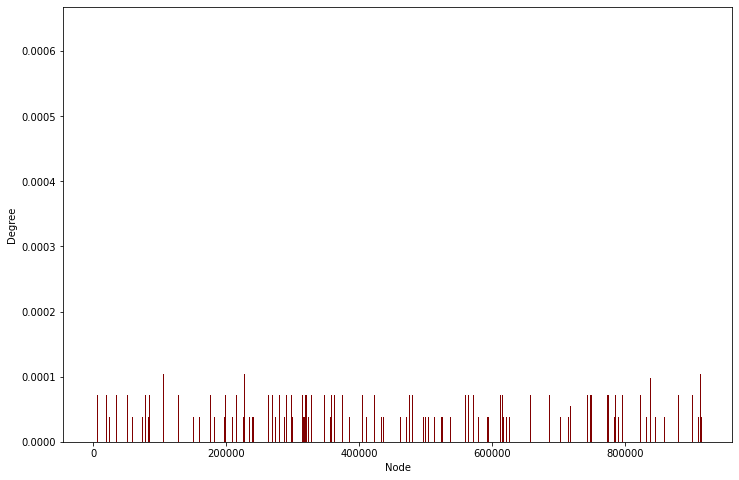

In [22]:
pageRankCentrality = nx.pagerank(G1, max_iter = 10000)
plt.figure(figsize=(12, 8)) 
key = list(pageRankCentrality.keys());
value = list(pageRankCentrality.values());
#print(key)
#print(value)
plt.bar(key,value, color ='maroon',width=10
        ) 
plt.xlabel('Node')
plt.ylabel('Degree')
plt.show()

**Closeness Centrality**

In [23]:
closenessCentrality = nx.closeness_centrality(G1)
closenessCentrality

{442528: 0.0,
 306958: 5.6085249579360626e-05,
 836558: 0.0,
 205581: 5.6085249579360626e-05,
 594293: 0.0,
 674164: 5.6085249579360626e-05,
 209151: 0.0,
 181334: 5.6085249579360626e-05,
 335342: 0.0,
 609886: 5.6085249579360626e-05,
 155829: 0.0,
 537039: 0.0010095344924284913,
 361556: 0.0,
 690211: 5.6085249579360626e-05,
 137210: 0.0,
 580256: 5.6085249579360626e-05,
 315382: 0.0,
 796719: 5.6085249579360626e-05,
 654387: 0.0,
 587935: 0.00028042624789680314,
 207028: 0.0,
 332463: 5.6085249579360626e-05,
 196520: 0.0,
 6111: 5.6085249579360626e-05,
 202724: 0.0,
 883244: 5.6085249579360626e-05,
 477922: 0.0,
 646710: 5.6085249579360626e-05,
 323341: 0.0,
 195650: 5.6085249579360626e-05,
 419387: 0.0,
 213432: 0.0006730229949523276,
 73308: 0.0,
 843868: 5.6085249579360626e-05,
 235659: 0.0,
 445903: 5.6085249579360626e-05,
 119719: 0.0,
 607402: 5.6085249579360626e-05,
 657806: 0.0,
 90786: 5.6085249579360626e-05,
 796849: 0.0,
 114705: 5.6085249579360626e-05,
 80794: 0.0,
 42363

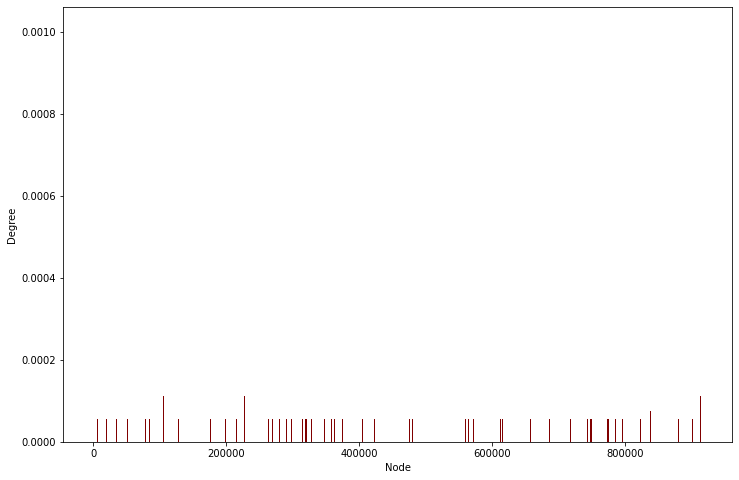

In [24]:
closenessCentrality = nx.closeness_centrality(G1)
plt.figure(figsize=(12, 8)) 
key = list(closenessCentrality.keys());
value = list(closenessCentrality.values());
#print(key)
#print(value)
plt.bar(key,value, color ='maroon',width=10
        ) 
plt.xlabel('Node')
plt.ylabel('Degree')
plt.show()

**Betweenness Centrality**

In [25]:
betweennessCentrality = nx.betweenness_centrality(G1)
betweennessCentrality

{442528: 0.0,
 306958: 0.0,
 836558: 0.0,
 205581: 0.0,
 594293: 0.0,
 674164: 0.0,
 209151: 0.0,
 181334: 0.0,
 335342: 0.0,
 609886: 0.0,
 155829: 0.0,
 537039: 0.0,
 361556: 0.0,
 690211: 0.0,
 137210: 0.0,
 580256: 0.0,
 315382: 0.0,
 796719: 0.0,
 654387: 0.0,
 587935: 0.0,
 207028: 0.0,
 332463: 0.0,
 196520: 0.0,
 6111: 0.0,
 202724: 0.0,
 883244: 0.0,
 477922: 0.0,
 646710: 0.0,
 323341: 0.0,
 195650: 0.0,
 419387: 0.0,
 213432: 0.0,
 73308: 0.0,
 843868: 0.0,
 235659: 0.0,
 445903: 0.0,
 119719: 0.0,
 607402: 0.0,
 657806: 0.0,
 90786: 0.0,
 796849: 0.0,
 114705: 0.0,
 80794: 0.0,
 423631: 0.0,
 284990: 0.0,
 845063: 0.0,
 9246: 0.0,
 609502: 0.0,
 674497: 0.0,
 317538: 0.0,
 490718: 0.0,
 730418: 0.0,
 83679: 3.145731649523845e-09,
 541471: 0.0,
 343740: 0.0,
 519741: 0.0,
 431691: 0.0,
 43792: 0.0,
 184072: 0.0,
 879962: 0.0,
 887960: 0.0,
 810446: 0.0,
 447910: 0.0,
 414094: 0.0,
 52364: 0.0,
 207582: 0.0,
 499474: 0.0,
 552319: 0.0,
 688048: 0.0,
 558791: 0.0,
 691753: 0.0

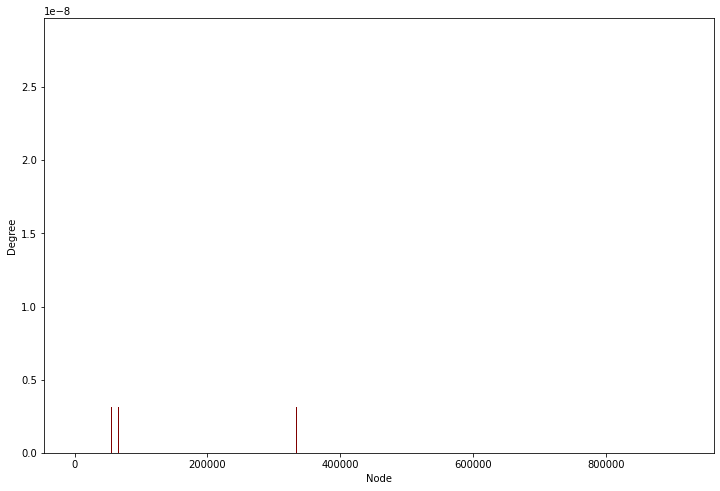

In [27]:
plt.figure(figsize=(12, 8)) 
key = list(betweennessCentrality.keys());
value = list(betweennessCentrality.values());
#print(key)
#print(value)
plt.bar(key,value, color ='maroon',width=10
        ) 
plt.xlabel('Node')
plt.ylabel('Degree')
plt.show()

# **Clustering Coefficient**

In [ ]:
localClusteringCoefficient=nx.clustering(G)
localClusteringCoefficient

In [ ]:
globalClusteringCoefficient = np.mean(list(localClusteringCoefficient.values()))
globalClusteringCoefficient

**Reciprocity & Transitivity**

In [ ]:
reciprocity=nx.reciprocity(G)
transitivity=nx.transitivity(G)

print(reciprocity)
print(transitivity)